# Iris Project - Priya Varma
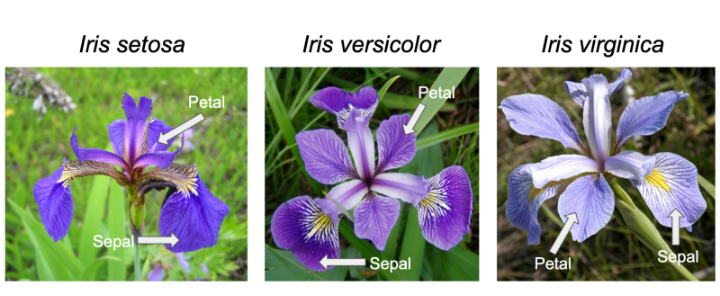

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# Step 1: Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Step 2: Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.duplicated().sum()

1

# Step 3 : Seperate X and Y

In [6]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [7]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [9]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species'>

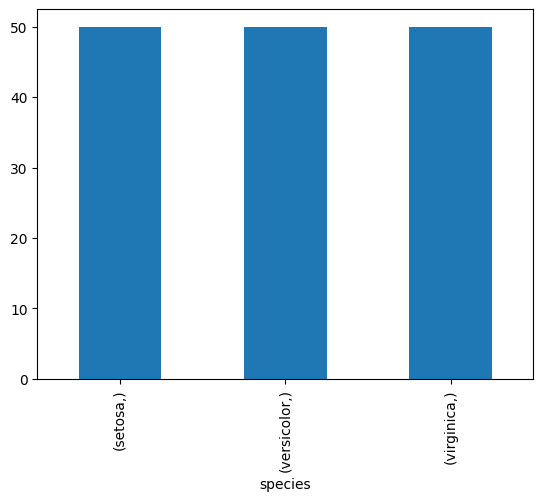

In [10]:
Y.value_counts().plot(kind='bar')

# Step 4: Create a preprocessing pipeline for X

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [12]:
num_pipe = Pipeline(steps=[('impute' , SimpleImputer(strategy='mean')),
                           ('scaler' , StandardScaler())]).set_output(transform='pandas')

In [13]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [14]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

# Save above num_pipe

In [15]:
import pickle

In [16]:
#'r' - loading / reading the file

#'w' - writing / saving the file

# 'a' - to add / to edit existing file
with open('pre.pkl', 'wb') as file1:    ## here wb is saving file in binary format
    pickle.dump(num_pipe , file1) 

# Step 5: Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(X_pre , Y , test_size=0.33 , random_state=42)

In [18]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
96,-0.173674,-0.362176,0.251221,0.132510
105,2.128516,-0.131979,1.615320,1.185567
66,-0.294842,-0.131979,0.421734,0.395774
0,-0.900681,1.019004,-1.340227,-1.315444
122,2.249683,-0.592373,1.672157,1.053935


In [19]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


In [20]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.310998,-0.592373,0.535409,0.000878
18,-0.173674,1.709595,-1.169714,-1.183812
118,2.249683,-1.052767,1.785832,1.448832
78,0.189830,-0.362176,0.421734,0.395774
76,1.159173,-0.592373,0.592246,0.264142


In [21]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


In [22]:
xtest.shape

(50, 4)

In [23]:
ytest.shape

(50, 1)

# Step 6: Build and save the model

In [24]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(xtrain,ytrain)

LogisticRegression()

# Step 7 : Evaluate the model

In [25]:
model1.score(xtrain,ytrain)

0.96

In [26]:
model1.score(xtest,ytest)

0.98

# Plot the confusion matrix for test

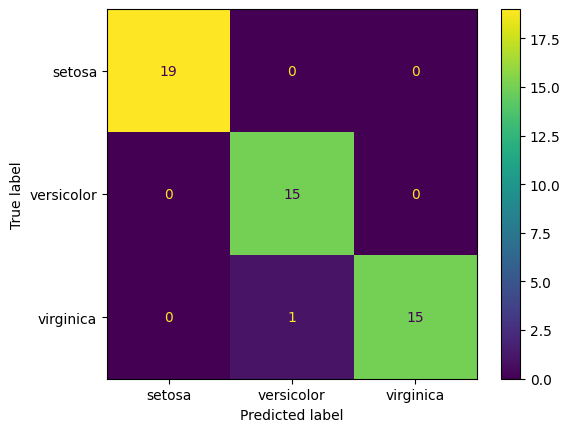

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model1 , xtest , ytest)

In [28]:
ypred_train = model1.predict(xtrain)
ypred_test = model1.predict(xtest)

In [29]:
ypred_train[0:5]

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica'],
      dtype=object)

In [30]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [31]:
ypred_test[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [32]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


# Print the classification report

In [33]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# Get the cross validated  f1_macro score

In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model1 , xtrain , ytrain , cv=5 , scoring='f1_macro')

In [35]:
scores

array([1.        , 0.80952381, 0.90277778, 1.        , 0.94747475])

In [36]:
scores.mean()

0.9319552669552669

## Above model has f1_macro 5 fold cross validatd score mode than > 0.8 i.e 0.93 Therefore above model is definately good model


## Save above model for future use

In [37]:
with open("model.pkl", 'wb') as file2:
    pickle.dump(model1 , file2)

# Reading pickle files in other files

1: 'rb' - used to load/read file

2: 'wb' - used to write/save file

In [38]:
with open('pre.pkl' , 'rb') as file3:
    pre = pickle.load(file3)

In [39]:
pre

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

In [40]:
pre.get_feature_names_out()

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [41]:
with open('model.pkl' , 'rb') as file4:
    m = pickle.load(file4)

In [42]:
m

LogisticRegression()